In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# sorts amino acids couples according to the distance df

def get_sorted_substitutions(distances_df):
    substitutions = []
    amino_acids = distances_df.index

    for source_acid in amino_acids:
        for target_acid in amino_acids:
            if source_acid != target_acid:
                distance = distances_df.loc[source_acid, target_acid]
                substitutions.append((source_acid, target_acid, distance))

    return sorted(substitutions, key=lambda x: x[2])

In [3]:
# read distance matrix
distances_csv = "../distance_matrix.csv"

sequences_csv = '../files/forchen_F_26L.csv'
sequences_header = "cdr3_amino_acid"
# sequences_csv = '../files/for_chen_B.csv'
# sequences_header = "CDR3.aa"


distances_df = pd.read_csv(distances_csv, index_col=0)
sequences_df = pd.read_csv(sequences_csv)


sorted_amino = get_sorted_substitutions(distances_df)


In [17]:
couples = {}
for seq in sequences_df[sequences_header]:
    letter_indexes = {}
    for sub in sorted_amino:
        
        flag = 0
        if not flag:
            if not sub[0] in letter_indexes:
                letter_indexes[sub[0]] = [index for index, char in enumerate(seq) if char == sub[0]]
            for occ in letter_indexes[sub[0]]:
                seq_to_search = seq[:occ] + sub[1] + seq[occ + 1:]
                if seq_to_search in couples:
                    continue
                if any(sequences_df[sequences_header] == seq_to_search):
                    # print(seq, seq_to_search)
                    flag = 1
                    couples[seq] = seq_to_search
                    break

            
        else:
            continue



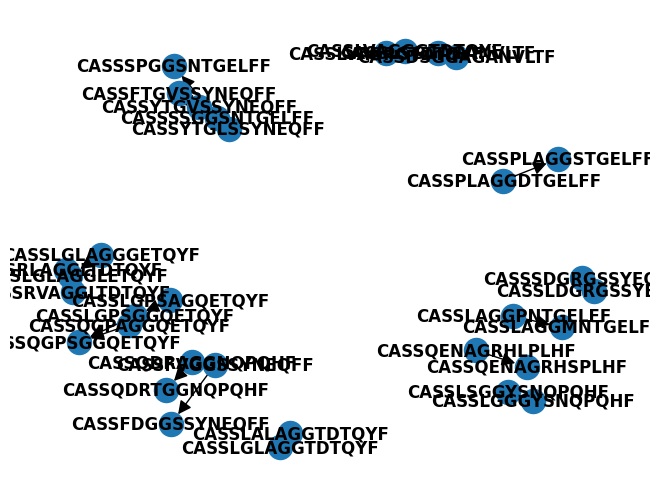

In [10]:
def create_graph(word_dict):
    G = nx.DiGraph()

    # Add nodes
    for source_word, target_word in word_dict.items():
        G.add_node(source_word)
        G.add_node(target_word)
        G.add_edge(source_word, target_word)

    return G

def draw_graph(graph):
    pos = nx.spring_layout(graph)  # Layout for node positioning
    nx.draw(graph, pos, with_labels=True, font_weight='bold', arrowsize=20)
    plt.show()

    # Create and draw the graph
graph = create_graph(couples)
draw_graph(graph)